In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from skimage import io, color


In [ ]:
def fourier_derivative(image, dx=0, dy=0):
    M, N = image.shape
    F = scipy.fft.fft2(image)

    kx = np.arange(N)
    ky = np.arange(M)
    kx = np.where(kx <= N//2, kx, kx - N)
    ky = np.where(ky <= M//2, ky, ky - M)
    u = kx / N
    v = ky / M
    U, V = np.meshgrid(u, v)

    kernel = (1j * 2 * np.pi * U)**dx * (1j * 2 * np.pi * V)**dy
    F_deriv = F * kernel

    deriv = np.real(scipy.fft.ifft2(F_deriv))
    return deriv


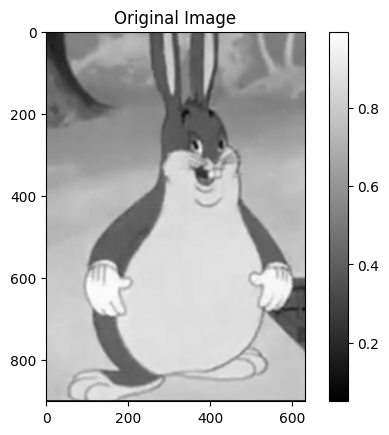

In [7]:
img = io.imread("image.png", as_gray=True)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.show()


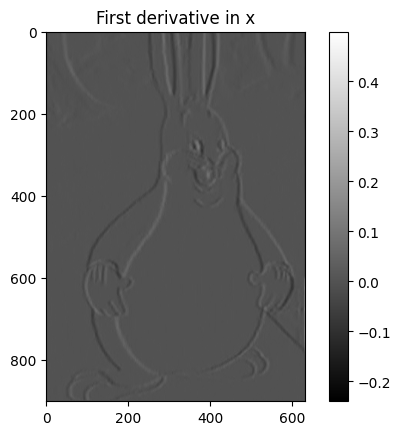

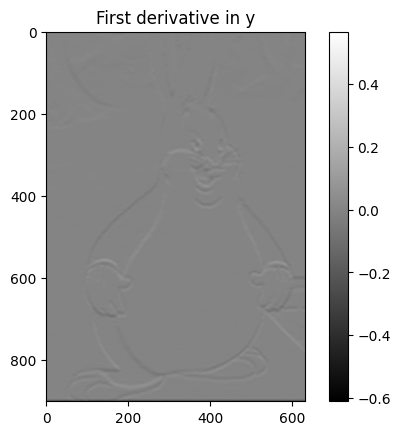

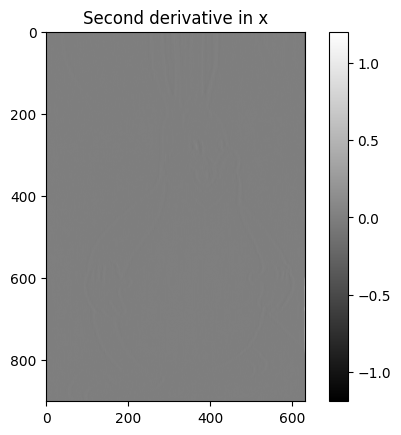

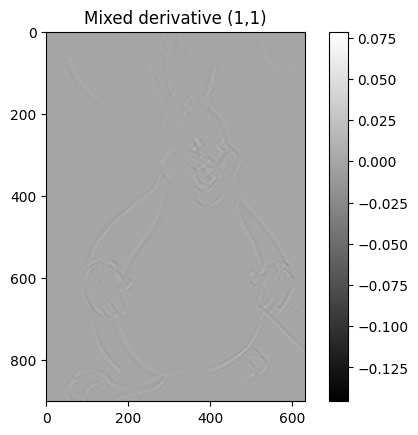

In [8]:
dx1 = fourier_derivative(img, dx=1, dy=0)

plt.imshow(dx1, cmap='gray')
plt.title("First derivative in x")
plt.colorbar()
plt.show()

dy1 = fourier_derivative(img, dx=0, dy=1)

plt.imshow(dy1, cmap='gray')
plt.title("First derivative in y")
plt.colorbar()
plt.show()

dx2 = fourier_derivative(img, dx=2, dy=0)

plt.imshow(dx2, cmap='gray')
plt.title("Second derivative in x")
plt.colorbar()
plt.show()

dxy = fourier_derivative(img, dx=1, dy=1)

plt.imshow(dxy, cmap='gray')
plt.title("Mixed derivative (1,1)")
plt.colorbar()
plt.show()


